In [6]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [7]:
# Now we need to read in the data
df = pd.read_excel(r'C:\Users\Hakim\Downloads\les-titres-les-plus-pretes_1.xlsx')
df.head()

,Rang,Type de document,Prêts,Titre,Auteur,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
0,1.0,Livre jeunesse,1189,Max se trouve trop petit,"Saint-Mars, Dominique de",53,3471,1799,135
1,11.0,Livre jeunesse,1019,Max et Lili ont peur des images violentes,"Saint-Mars, Dominique de",51,4522,1407,119
2,53.0,Bande dessinée jeunesse,804,"Poux, papous et pas papous","Cohen, Jacqueline",50,7158,1142,100
3,126.0,Livre jeunesse,700,Max et Lili sont malades,"Saint-Mars, Dominique de",37,4701,845,72
4,140.0,Bande dessinée jeunesse,683,Coeur du passé,"Sobral, Patrick",50,5057,905,85


In [8]:
#LEt's see if there is any missing data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Rang - 0.0%
Type de document - 0.0%
Prêts - 0.0%
Titre - 0.0%
Auteur - 0.044848484848484846%
Nombre de localisations - 0.0%
Nombre de prêt total - 0.0%
Nombre de prêts 2017 - 0.0%
Nombre d'exemplaires - 0.0%


In [9]:
# Fill missing values with the most frequent value of that column

df=df.fillna(df.mode().iloc[0])
df.head()

,Rang,Type de document,Prêts,Titre,Auteur,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
0,1.0,Livre jeunesse,1189,Max se trouve trop petit,"Saint-Mars, Dominique de",53,3471,1799,135
1,11.0,Livre jeunesse,1019,Max et Lili ont peur des images violentes,"Saint-Mars, Dominique de",51,4522,1407,119
2,53.0,Bande dessinée jeunesse,804,"Poux, papous et pas papous","Cohen, Jacqueline",50,7158,1142,100
3,126.0,Livre jeunesse,700,Max et Lili sont malades,"Saint-Mars, Dominique de",37,4701,845,72
4,140.0,Bande dessinée jeunesse,683,Coeur du passé,"Sobral, Patrick",50,5057,905,85


In [10]:
#Testing if still missing data on Auteur Column
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Rang - 0.0%
Type de document - 0.0%
Prêts - 0.0%
Titre - 0.0%
Auteur - 0.0%
Nombre de localisations - 0.0%
Nombre de prêt total - 0.0%
Nombre de prêts 2017 - 0.0%
Nombre d'exemplaires - 0.0%


In [11]:
# Data Types for our columns

df.dtypes

Rang                       float64
Type de document            object
Prêts                        int64
Titre                       object
Auteur                      object
Nombre de localisations      int64
Nombre de prêt total         int64
Nombre de prêts 2017         int64
Nombre d'exemplaires         int64
dtype: object

In [12]:
#Change data types of columns

df['Rang']=df['Rang'].astype('int64')

In [14]:
df1=df.sort_values(by=['Nombre de prêt total'],inplace=False,ascending=False)
df1.head()

,Rang,Type de document,Prêts,Titre,Auteur,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
194,7,Livre jeunesse,1050,Max et Lili ont des pouvoirs magiques,"Saint-Mars, Dominique de",52,9743,1555,134
536,27,Bande dessinée jeunesse,879,La salsa des saucisses,"Cohen, Jacqueline",49,9196,1234,107
532,23,Livre jeunesse,930,Lili veut un téléphone portable,"Saint-Mars, Dominique de",45,9056,1310,118
715,21,Bande dessinée jeunesse,936,"Ben ça, alors !","Cohen, Jacqueline",48,8837,1329,122
106,31,Livre jeunesse,861,Max et Lili veulent éduquer leurs parents,"Saint-Mars, Dominique de",48,8529,1163,112


In [15]:
pd.set_option('display.max_rows',None)

In [18]:
#Drop any duplicates
df2=df['Titre'].sort_values(ascending=False)


In [20]:
df['Titre']=df['Titre'].drop_duplicates()

In [34]:
# Nombre Exemplaire Higher Correlation
# Pret Total High Correlation


<AxesSubplot:>

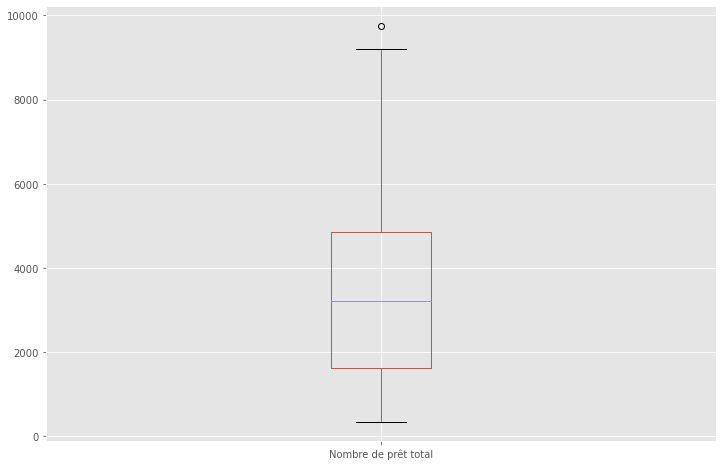

In [28]:
# Are there any Outliers?

df1.boxplot(column=['Nombre de prêt total'])

## Pas de valeurs abérrentes 

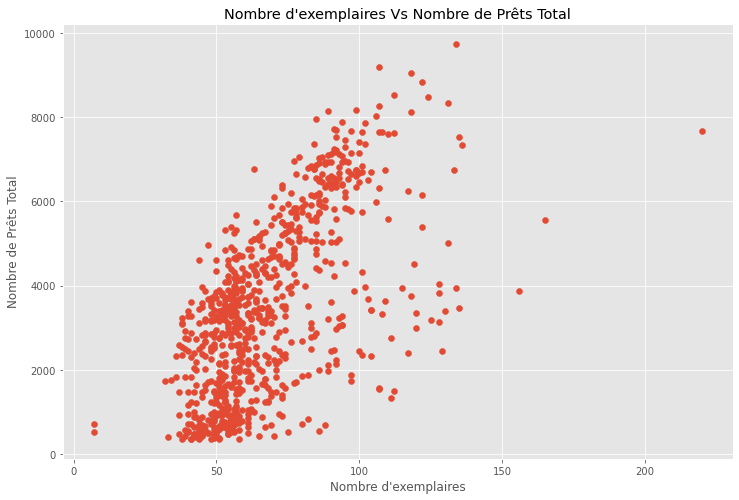

In [21]:
#Scatter plot with Nombre Exemplaire vs Total Pret

plt.scatter(x=df["Nombre d'exemplaires"],y=df['Nombre de prêt total'])

plt.title("Nombre d'exemplaires Vs Nombre de Prêts Total")

plt.xlabel("Nombre d'exemplaires")
plt.ylabel("Nombre de Prêts Total")

plt.show()

<AxesSubplot:xlabel="Nombre d'exemplaires", ylabel='Nombre de prêt total'>

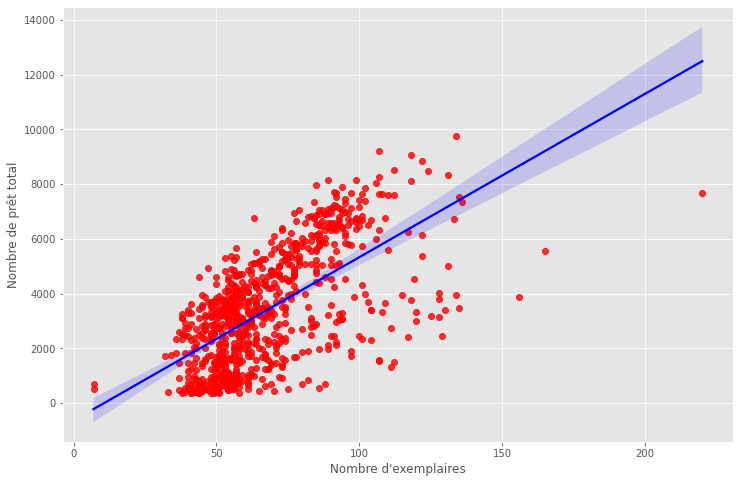

In [22]:
# Plot Nombre Exemplaire vs Total Pret
 
sns.regplot(x="Nombre d'exemplaires",y='Nombre de prêt total',
            data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [23]:
df.corr()

,Rang,Prêts,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
Rang,1.000000,-0.915945,-0.283846,-0.600655,-0.685908,-0.630483
Prêts,-0.915945,1.000000,0.284731,0.627521,0.763236,0.717956
Nombre de localisations,-0.283846,0.284731,1.000000,0.058012,0.182459,0.497839
Nombre de prêt total,-0.600655,0.627521,0.058012,1.000000,0.784249,0.629505
Nombre de prêts 2017,-0.685908,0.763236,0.182459,0.784249,1.000000,0.654328
Nombre d'exemplaires,-0.630483,0.717956,0.497839,0.629505,0.654328,1.000000


In [31]:
# Correlation Matrix between all numeric columns

df1.corr(method ='pearson')

,Rang,Prêts,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
Rang,1.000000,-0.915945,-0.283846,-0.600655,-0.685908,-0.630483
Prêts,-0.915945,1.000000,0.284731,0.627521,0.763236,0.717956
Nombre de localisations,-0.283846,0.284731,1.000000,0.058012,0.182459,0.497839
Nombre de prêt total,-0.600655,0.627521,0.058012,1.000000,0.784249,0.629505
Nombre de prêts 2017,-0.685908,0.763236,0.182459,0.784249,1.000000,0.654328
Nombre d'exemplaires,-0.630483,0.717956,0.497839,0.629505,0.654328,1.000000


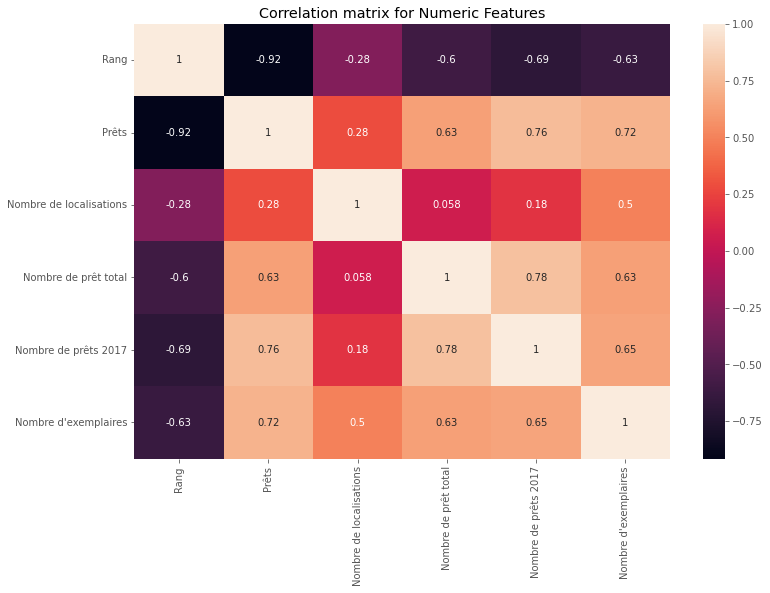

In [32]:
correlation_matrix = df1.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")



plt.show()

In [33]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df1.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Rang,Type de document,Prêts,Titre,Auteur,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
Rang,1.000000,0.569044,0.698631,0.998336,0.734374,0.048387,0.999916,0.901512,0.629791
Type de document,0.569044,1.000000,0.295411,0.570018,0.688925,-0.056766,0.566241,0.540350,0.331513
Prêts,0.698631,0.295411,1.000000,0.698832,0.436567,0.137803,0.703191,0.640503,0.566624
Titre,0.998336,0.570018,0.698832,1.000000,0.735802,0.042112,0.998231,0.899971,0.627113
Auteur,0.734374,0.688925,0.436567,0.735802,1.000000,-0.114804,0.731915,0.691670,0.399531
Nombre de localisations,0.048387,-0.056766,0.137803,0.042112,-0.114804,1.000000,0.050700,0.070410,0.353133
Nombre de prêt total,0.999916,0.566241,0.703191,0.998231,0.731915,0.050700,1.000000,0.902218,0.633266
Nombre de prêts 2017,0.901512,0.540350,0.640503,0.899971,0.691670,0.070410,0.902218,1.000000,0.612160
Nombre d'exemplaires,0.629791,0.331513,0.566624,0.627113,0.399531,0.353133,0.633266,0.612160,1.000000


In [40]:

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,Rang,Type de document,Prêts,Titre,Auteur,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
194,7,6,1050,541,179,52,9743,1555,134
536,27,0,879,315,38,49,9196,1234,107
532,23,6,930,494,179,45,9056,1310,118
715,21,0,936,53,38,48,8837,1329,122
106,31,6,861,553,179,48,8529,1163,112


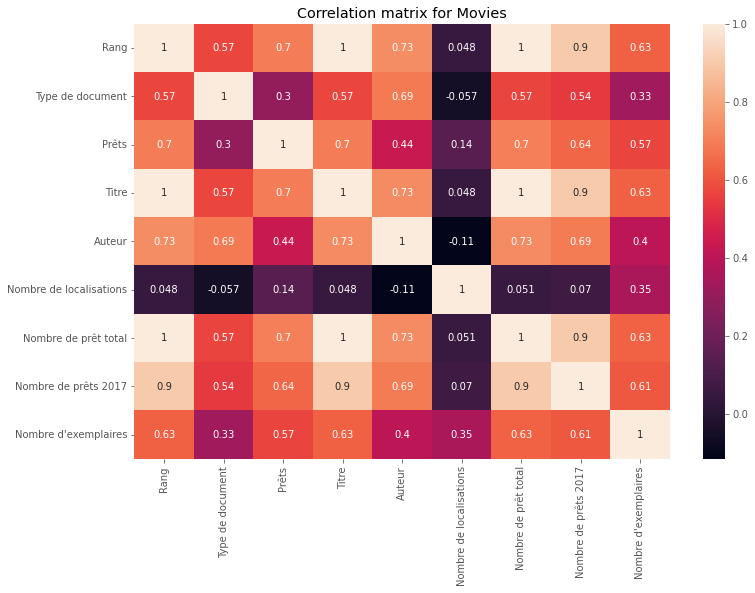

In [41]:
correlation_matrix = df_numerized.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")


plt.show()


In [42]:

correlation_mat = df_numerized.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

#print(corr_pairs)

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

#print(sorted_pairs)


# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Type de document         Nombre de prêts 2017       0.540350
Nombre de prêts 2017     Type de document           0.540350
Type de document         Nombre de prêt total       0.566241
Nombre de prêt total     Type de document           0.566241
Prêts                    Nombre d'exemplaires       0.566624
Nombre d'exemplaires     Prêts                      0.566624
Type de document         Rang                       0.569052
Rang                     Type de document           0.569052
Type de document         Titre                      0.570141
Titre                    Type de document           0.570141
Nombre de prêts 2017     Nombre d'exemplaires       0.612160
Nombre d'exemplaires     Nombre de prêts 2017       0.612160
                         Titre                      0.629321
Titre                    Nombre d'exemplaires       0.629321
Nombre d'exemplaires     Rang                       0.629779
Rang                     Nombre d'exemplaires       0.629779
Nombre de prêt total    